 FUZZY SET 'CAR SPEED' 

Fuzzy set: Slow
Parameters: a=0, b=0, c=40
----------------------------------------
Fuzzy set: Moderate
Parameters: a=20, b=50, c=80
----------------------------------------
Fuzzy set: High
Parameters: a=60, b=90, c=120
----------------------------------------
Fuzzy set: Dangerous
Parameters: a=100, b=130, c=160
----------------------------------------


Results for speed 23.0 km/h:
------------------------------
Slow: 0.425
Moderate: 0.100
High: 0.000
Dangerous: 0.000

Most suitable category: 'Slow' (membership degree: 0.425)


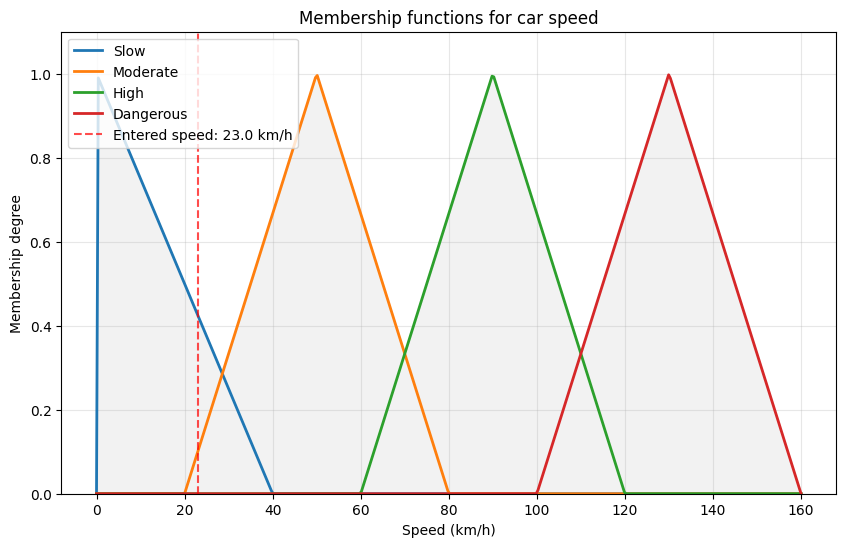



Results for speed 75.0 km/h:
------------------------------
Slow: 0.000
Moderate: 0.167
High: 0.500
Dangerous: 0.000

Most suitable category: 'High' (membership degree: 0.500)


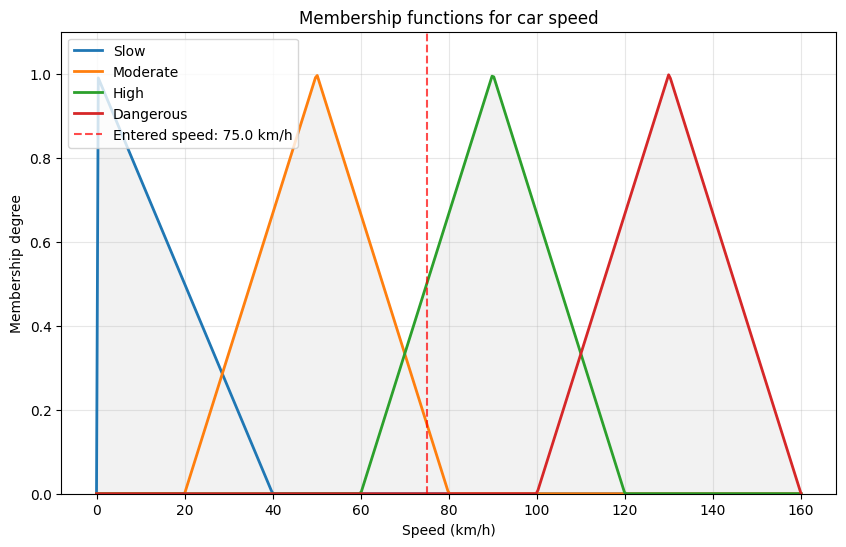



Results for speed 150.0 km/h:
------------------------------
Slow: 0.000
Moderate: 0.000
High: 0.000
Dangerous: 0.333

Most suitable category: 'Dangerous' (membership degree: 0.333)


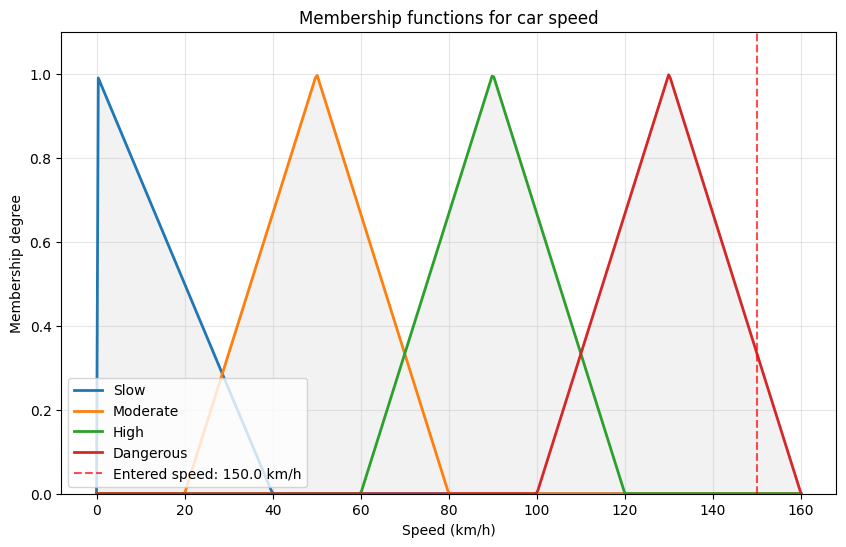


Exiting program.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class TriangularFuzzySet:
    def __init__(self, name, a, b, c):
        """
        Triangular membership function
        a - left boundary (membership = 0)
        b - peak (membership = 1)
        c - right boundary (membership = 0)
        """
        self.name = name
        self.a = a
        self.b = b
        self.c = c
    
    def membership(self, x):
        """Calculates the membership degree for value x"""
        if x <= self.a:
            return 0.0
        elif self.a < x <= self.b:
            return (x - self.a) / (self.b - self.a)
        elif self.b < x < self.c:
            return (self.c - x) / (self.c - self.b)
        else:
            return 0.0
    
    def plot(self, x_range):
        """Displays the membership function graph"""
        y = [self.membership(x) for x in x_range]
        plt.plot(x_range, y, label=self.name, linewidth=2)
    
    def __str__(self):
        return f"Fuzzy set: {self.name}\nParameters: a={self.a}, b={self.b}, c={self.c}"

def main():
    slow = TriangularFuzzySet("Slow", 0, 0, 40)
    moderate = TriangularFuzzySet("Moderate", 20, 50, 80)
    high = TriangularFuzzySet("High", 60, 90, 120)
    dangerous = TriangularFuzzySet("Dangerous", 100, 130, 160)
    
    fuzzy_sets = [slow, moderate, high, dangerous]
    
    print(" FUZZY SET 'CAR SPEED' \n")
    
    # Display information about all sets
    for fs in fuzzy_sets:
        print(fs)
        print("-" * 40)
    
    while True:
        try:
            print("\n" + "="*50)
            speed = float(input("Enter car speed (or '0' to exit): "))
            
            if speed == 0:
                print("Exiting program.")
                break
            
            print(f"\nResults for speed {speed} km/h:")
            print("-" * 30)
            
            # Calculate membership degrees for each category
            results = []
            for fs in fuzzy_sets:
                membership_value = fs.membership(speed)
                results.append((fs.name, membership_value))
                print(f"{fs.name}: {membership_value:.3f}")
            
            # Find the most suitable category
            max_membership = max(results, key=lambda x: x[1])
            print(f"\nMost suitable category: '{max_membership[0]}' "
                  f"(membership degree: {max_membership[1]:.3f})")
            
            # Visualization
            x_range = np.linspace(0, 160, 400)
            plt.figure(figsize=(10, 6))
            
            for fs in fuzzy_sets:
                fs.plot(x_range)
            
            plt.axvline(x=speed, color='red', linestyle='--', alpha=0.7, label=f'Entered speed: {speed} km/h')
            plt.fill_between(x_range, 0, [max(fs.membership(x) for fs in fuzzy_sets) for x in x_range], 
                           alpha=0.1, color='gray')
            
            plt.title('Membership functions for car speed')
            plt.xlabel('Speed (km/h)')
            plt.ylabel('Membership degree')
            plt.legend()
            plt.grid(True, alpha=0.3)
            plt.ylim(0, 1.1)
            plt.show()
            
        except ValueError:
            print("Error! Please enter a numeric value.")
        except KeyboardInterrupt:
            print("\nProgram terminated.")
            break

if __name__ == "__main__":
    main()